In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np

In [2]:
pl.rcParams['figure.figsize'] = (9/2.54, 7/2.54)
pl.rcParams['font.size'] = 9
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 300

In [3]:
df = pd.read_csv('../data_input/SPM2c_data.csv')

In [4]:
df

,Driver,total GSAT effect,5% very likely lower limit,95% very likely upper limit
0,Carbon dioxide (CO_2),0.788254,0.521952,1.247635
1,Methane (CH_4),0.513237,0.294718,0.840575
2,Nitrous oxide (N_2O),0.091731,0.045557,0.155209
3,Halogenated gases (CFC + HCFC + HFC),0.098762,0.005151,0.203464
4,Nitrogen oxides (NO_x),-0.137032,-0.299279,0.011594
5,Volatile organic compounds and carbon monoxide...,0.223527,0.093978,0.391009
6,Sulphur dioxide (SO_2),-0.485553,-0.931216,-0.104174
7,Organic carbon,-0.069498,-0.154982,0.009359
8,Black carbon,0.093069,-0.068966,0.257277
9,Ammonia,-0.014523,-0.023187,-0.009279


In [5]:
hot = '#cc404a'
cool= '#304fbf'

In [6]:
drivers = list(df['Driver'])
drivers

['Carbon dioxide (CO_2)',
 'Methane (CH_4)',
 'Nitrous oxide (N_2O)',
 'Halogenated gases (CFC + HCFC + HFC)',
 'Nitrogen oxides (NO_x)',
 'Volatile organic compounds and carbon monoxide (NMVOC + CO)',
 'Sulphur dioxide (SO_2)',
 'Organic carbon',
 'Black carbon',
 'Ammonia',
 'Land-use reflectance and irrigation (irrig+albedo)',
 'Aviation contrails']

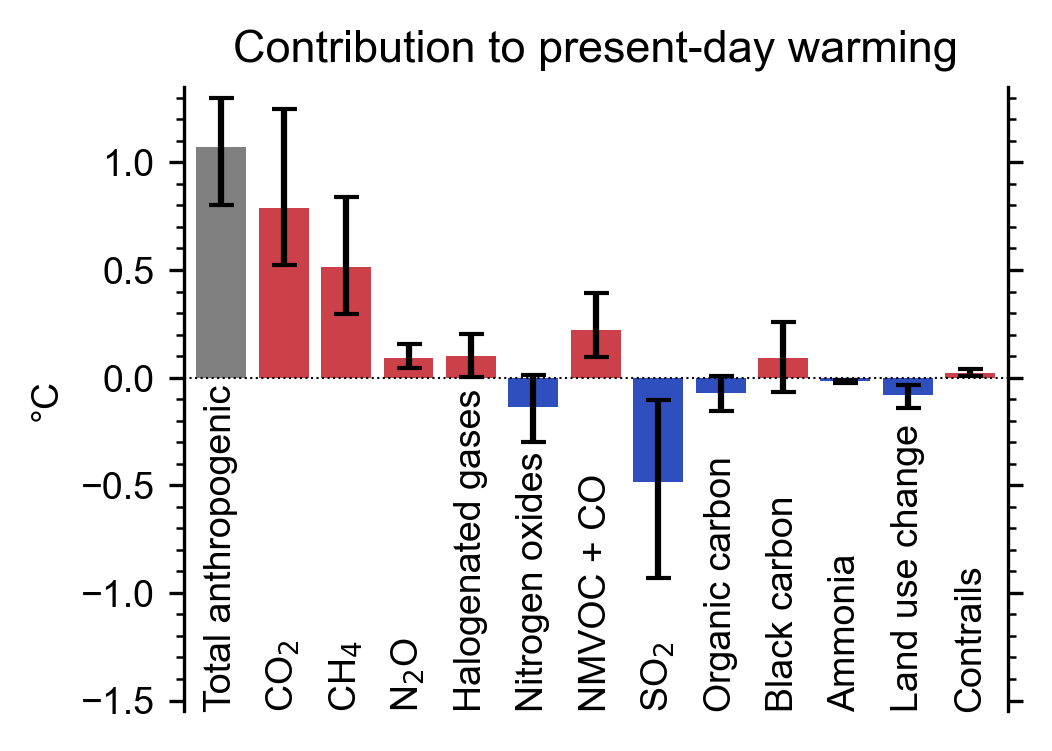

In [7]:
fig, ax = pl.subplots()

ax.bar(-1, 1.07, color='grey')
eb = ax.errorbar(
    -1,
    1.07,
    yerr=np.array([1.07-0.8, 1.3-1.07]).reshape((2,1)),
    capsize=3,
    color='k'
)

for i, driver in enumerate(drivers):
    positive = df.loc[df['Driver']==driver, 'total GSAT effect'].values[0] > 0
    ax.bar(i, df.loc[df['Driver']==driver, 'total GSAT effect'], color=(hot if positive else cool))
    eb = ax.errorbar(
        i,
        df.loc[df['Driver']==driver, 'total GSAT effect'],
        yerr=np.array([
            (
                df.loc[df['Driver']==driver, 'total GSAT effect']-
                df.loc[df['Driver']==driver, '5% very likely lower limit']
            ), (
                df.loc[df['Driver']==driver, '95% very likely upper limit']-
                df.loc[df['Driver']==driver, 'total GSAT effect']
            )
        ]).reshape((2,1)),
        capsize=3,
        color='k'
    )
ax.tick_params(axis='x', which='both', bottom=False, top=False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels([])

labels = [
    'Total anthropogenic',
    'CO$_2$',
    'CH$_4$',
    'N$_2$O',
    'Halogenated gases',
    'Nitrogen oxides',
    'NMVOC + CO',
    'SO$_2$',
    'Organic carbon',
    'Black carbon',
    'Ammonia',
    'Land use change',
    'Contrails',
]

for i, label in enumerate(labels):
    ax.text(i-1, -1.55, label, rotation=90, ha='center', va='bottom')

ax.set_ylabel("°C")
ax.set_title('Contribution to present-day warming')
ax.set_xlim(-1.6, 11.6)
ax.set_ylim(-1.55, 1.35)
ax.axhline(0, ls=":", color='k', lw=0.5)

pl.savefig('../figures/fig2c.png')
pl.savefig('../figures/fig2c.pdf')